In [98]:
import pandas as pd
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats     # metryki statystyczne (pakiet zawiera więcej metryk dla regresji liniowej niż sklearn)
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as ssp
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('house.csv')

In [3]:
df = df.drop(columns = ['Unnamed: 0'])

In [4]:
df.head()

,apartment_room_number,apartment_floor,building_year,location_latitude,location_longitude,location_city_name,private_offer,price_y,area_total_y,price_permeter_y
0,3,0,2019.0,67.740290,56.945660,gdańskbrzeźno,0,219254.0,672.000000,19254.0
1,3,0,1997.0,138.671200,293.206000,gdańskzakoniczyn,0,28375.0,3.388060,8375.0
2,3,1,2012.0,134.600000,266.650000,gdańskujeścisko,0,28560.0,3.336449,8560.0
3,1,2,1974.0,52.282204,20.976530,warszawa,1,318999.0,32.000000,9969.0
4,3,3,1990.0,52.263159,20.920753,warszawa,1,600000.0,62.000000,9677.0


In [5]:
df.describe()  # obliczenie podstwowych statystyk

,apartment_room_number,apartment_floor,building_year,location_latitude,location_longitude,private_offer,price_y,area_total_y,price_permeter_y
count,49707.000000,49707.000000,49707.000000,49707.000000,49707.000000,49707.000000,4.970700e+04,49524.000000,49524.000000
mean,2.664373,0.179069,2002.392198,55.984364,26.069654,0.129056,4.626348e+05,75.818882,8209.857365
std,0.937723,0.966038,257.121110,30.403853,41.656125,0.335266,3.698312e+05,1927.625175,3521.259497
min,1.000000,0.000000,1.000000,0.189970,0.064450,0.000000,0.000000e+00,1.000000,0.287356
25%,2.000000,0.000000,1988.000000,50.938480,17.111280,0.000000,2.973220e+05,42.100037,6100.000000
50%,3.000000,0.000000,2018.000000,52.176720,19.189160,0.000000,3.925000e+05,53.800389,7609.000000
75%,3.000000,0.000000,2020.000000,52.410490,20.990780,0.000000,5.274360e+05,67.610422,9691.000000
max,11.000000,49.000000,32767.000000,662.561800,469.732800,1.000000,2.000000e+07,428037.000000,135803.000000


In [6]:
df[df.columns[1:]].mad() # obliczenie odchylenia przeciętnego

apartment_floor            0.337280
building_year             26.831255
location_latitude          8.278583
location_longitude        13.362115
private_offer              0.224801
price_y               195971.757279
area_total_y              43.880723
price_permeter_y        2456.619992
dtype: float64

In [46]:
p_price = df.price_y
df[df.columns['price_y']].plot.box( figsize = (10,5), fontsize = 10) # boxplot zmiennej zależnej

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

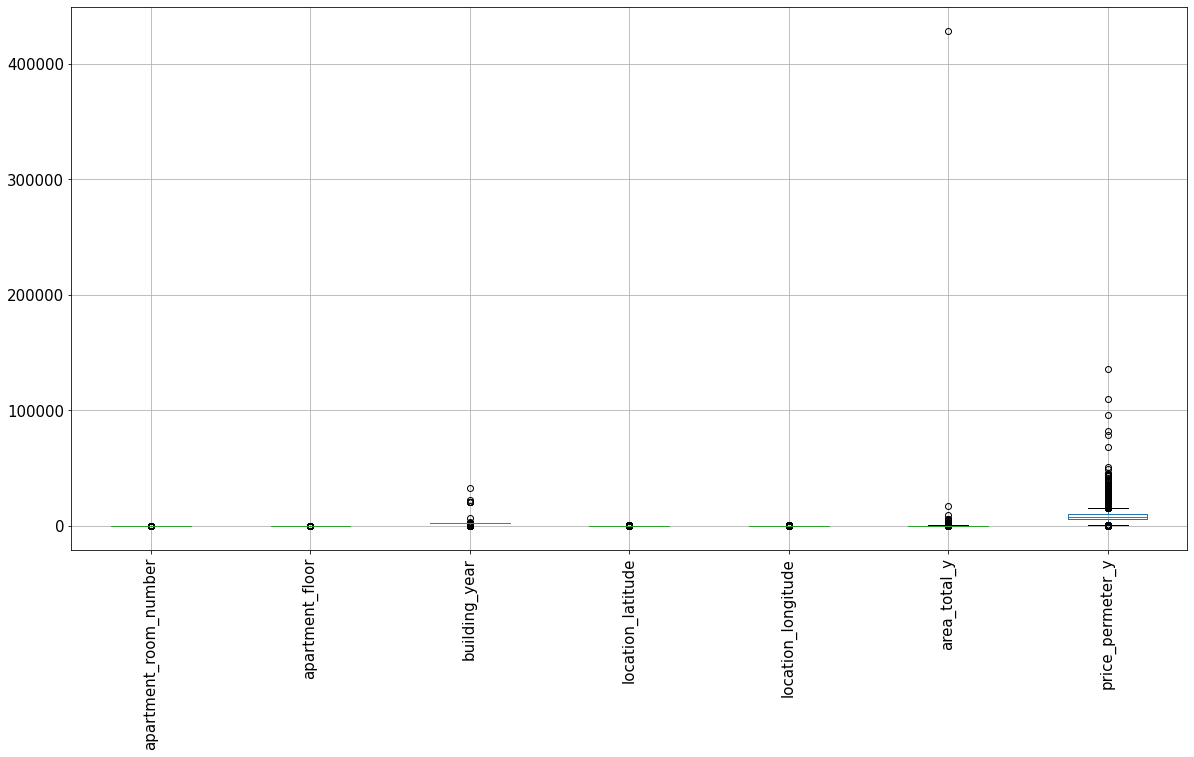

In [38]:
# boxplot zmiennych niezależnych

plot_other = other.boxplot(rot = 90, figsize = (20,10), fontsize = 15)

(<matplotlib.axes._subplots.AxesSubplot at 0x13e1098ca08>,)

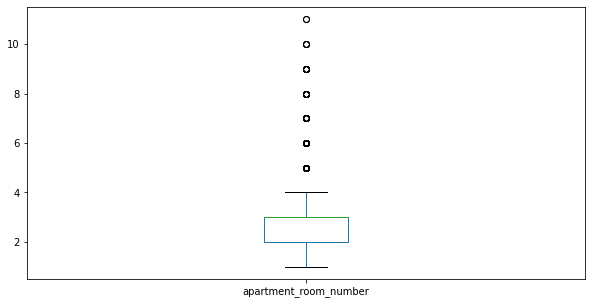

In [65]:
df[df.columns[0]].plot.box( figsize = (10,5), fontsize = 10),  # boxplot liczby pokoi

In [67]:
df.apartment_room_number.mean()

2.6643732271108695

(<matplotlib.axes._subplots.AxesSubplot at 0x13e102a9548>,)

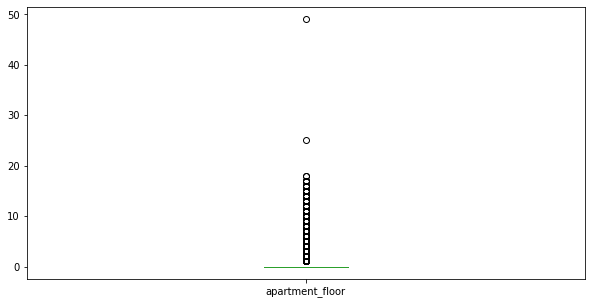

In [51]:
df[df.columns[1]].plot.box( figsize = (10,5), fontsize = 10),  # boxplot liczby pięter

In [63]:
df.apartment_floor.mean()

0.1790693463697266

In [86]:
df.where(df.apartment_floor > 20).dropna()
# dziwne bo na boxplocie jest punkt ok. 50

,apartment_room_number,apartment_floor,building_year,location_latitude,location_longitude,location_city_name,private_offer,price_y,area_total_y,price_permeter_y
398,2.0,25.0,2020.0,325.724,101.313,gdyniadąbrowa,0.0,26900.0,3.898551,6900.0


(<matplotlib.axes._subplots.AxesSubplot at 0x13e10302308>,)

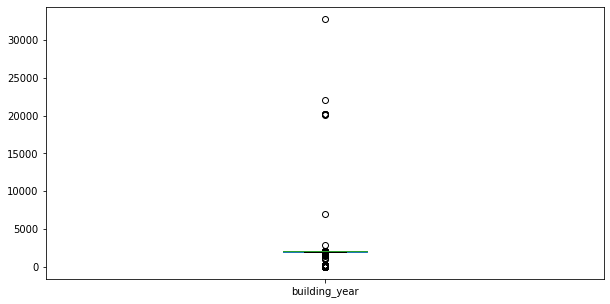

In [52]:
df[df.columns[2]].plot.box( figsize = (10,5), fontsize = 10),  # boxplot liczby roku budowy

In [69]:
df.building_year.max()

32767.0

In [76]:
df.where(df.building_year > 2020).dropna()  # do sprawdzenia czy pozostali tez takie mają

,apartment_room_number,apartment_floor,building_year,location_latitude,location_longitude,location_city_name,private_offer,price_y,area_total_y,price_permeter_y
6,4.0,0.0,2021.0,48.840000,439.420000,pruszcz gdański,1.0,26264.0,4.192848,6264.0
17,1.0,0.0,2021.0,51.051790,17.058290,wrocław,1.0,241000.0,25.000000,9640.0
50,5.0,9.0,2022.0,52.175695,21.066082,warszawa,1.0,1291394.0,118.000000,10944.0
56,3.0,4.0,2022.0,52.175695,21.066082,warszawa,1.0,720492.0,67.000000,10754.0
86,4.0,4.0,2021.0,116.071000,320.527300,gdańskłostowice,0.0,26316.0,4.166561,6316.0
...,...,...,...,...,...,...,...,...,...,...
49646,2.0,1.0,2022.0,52.232030,20.885770,warszawa,1.0,371000.0,37.000000,10027.0
49647,4.0,4.0,2021.0,51.762090,19.493040,łódź,1.0,459000.0,65.000000,7062.0
49648,3.0,1.0,2022.0,52.232030,20.885770,warszawa,1.0,519000.0,58.000000,8948.0
49649,2.0,1.0,2022.0,52.326590,20.950490,warszawa,1.0,299000.0,34.000000,8794.0


(<matplotlib.axes._subplots.AxesSubplot at 0x13e10371748>,)

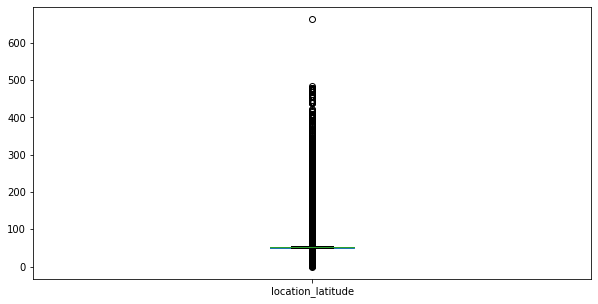

In [53]:
df[df.columns[3]].plot.box( figsize = (10,5), fontsize = 10),  # boxplot długości geograficznej

(<matplotlib.axes._subplots.AxesSubplot at 0x13e10764d08>,)

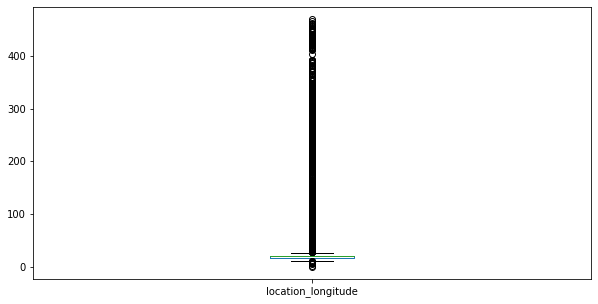

In [54]:
df[df.columns[4]].plot.box( figsize = (10,5), fontsize = 10),  # boxplot szerokości geograficznej

(<matplotlib.axes._subplots.AxesSubplot at 0x13e108aac88>,)

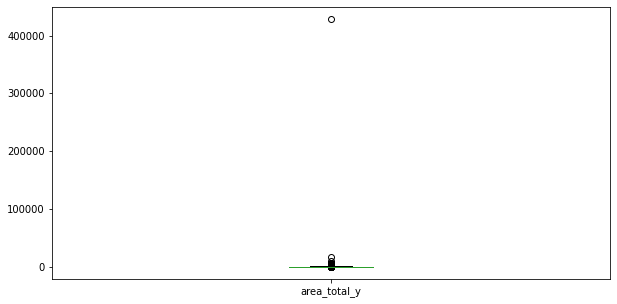

In [57]:
df[df.columns[8]].plot.box( figsize = (10,5), fontsize = 10),  # boxplot powierzchni
# można ew. usunąć jeszcze tego outlajera, ale outlajery były ogólnie usuwane wczesniej 

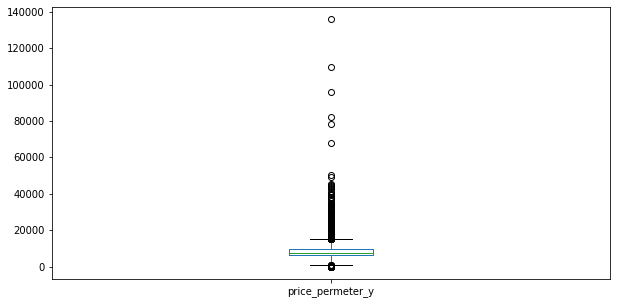

In [58]:
df[df.columns[9]].plot.box( figsize = (10,5), fontsize = 10)  # boxplot ceny na m2

In [94]:
cena = df[df.columns[7]].values
kde_estimator = st.gaussian_kde(cena)

In [96]:
# Prawdpodobieństwo otrzymania oferty sprzedaży mieszkania w zakresie cenowym

a = 200000
b = 500000
p = kde_estimator.integrate_box_1d(a,b) # całkowanie estymatora jądrowego w określonym przedziale 
p # prawdopodobieństwo otrzymania oferty sprzedaży

0.6187129451787157

In [ ]:
#Wykres gęstości prawdopodbieństwa dla zmiennej " price_y"

t = np.arange(0,300000,1) # zakres kalorii dla rysunku funkcji kde
tf = np.arange(a,b,1) # zakres kalorii dla rysunku wypełnienia

plt.fill_between(tf,0,kde_estimator(tf))
plt.plot(t,kde_estimator(t),"blue")
plt.xlabel("Calories [kcal]")
plt.ylabel("kde()")
pass

In [15]:
df.price_y.mean()

462634.7570764681

### model DecisionTreeRegression

In [ ]:
y = df.price_y  # wyznaczenie ceny jako y - dane wyjściowe

# feature_list = ['liczba_pokoi',  'pietro',  'rok_budowy',
#                    'powierzchnia']

feature_list = ['apartment_room_number', 'apartment_floor', 'building_year', 
                'location_latitude', 'location_longitude', 'area_total_y']

X = df[feature_list]  # wyznaczenie X jako danych wejściowych

In [ ]:
print(X.describe())  # wskazanie podstawowych danych

In [ ]:
model = DecisionTreeRegressor(random_state = 101) # stworzenie i uczenie modelu i wyznaczenie ziarna
model.fit(X, y)

83096.16780316387 142449.483207298
Slope:
  Std. err.:       1649.5842956315778
  p-value:         0.0 Reject the null hypothesis?  True
  Conf. interval:  (139736.10792464137, 145162.85848995464)
Slope:
  Std. err.:       1649.5842956315778
  p-value:         0.0 Reject the null hypothesis?  True
  Conf. interval:  (139216.2786667799, 145682.68774781612)
Slope:
  Std. err.:       1649.5842956315778
  p-value:         0.0 Reject the null hypothesis?  True
  Conf. interval:  (138200.2724661524, 146698.6939484436)
R^2 statistic:            0.13045604064971195
Residual Standard Error:  344868.6219517118
Percentage error:         0.7454446875782595


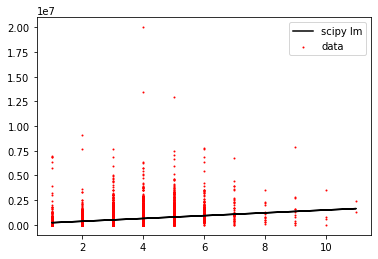

In [101]:
# predyktor - liczba pokoi - apartment_room_number
# zmienna przewidywana - cena

# dopasowanie regresji
x, y = df.apartment_room_number.values, df.price_y.values
n, p = df.shape 
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(intercept,slope)

# przedzaiały ufności
print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.10)
print("  Conf. interval: ", stats.t.interval(0.90, n-2, loc=slope, scale=std_err))

print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.05)
print("  Conf. interval: ", stats.t.interval(0.95, n-2, loc=slope, scale=std_err))

print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.01)
print("  Conf. interval: ", stats.t.interval(0.99, n-2, loc=slope, scale=std_err))

y_ = x * slope + intercept
print("R^2 statistic:           ", r2_score(y, y_))
print("Residual Standard Error: ", np.std((y - y_), ddof=2))
print("Percentage error:        ", np.std((y - y_), ddof=2) / np.mean(y))

# wykres 
plt.scatter(x,y,marker="o",s=1,c="red",label="data")
plt.plot(x,y_,c="black",label="scipy lm", linestyle = '-')  # w tym wierszu zamiast xp, yp wpisuje x i y_
plt.legend() 

467143.3025906124 -25177.651036015108
Slope:
  Std. err.:       1713.4365521446555
  p-value:         8.885762086224958e-49 Reject the null hypothesis?  True
  Conf. interval:  (-27996.055891894066, -22359.246180136153)
Slope:
  Std. err.:       1713.4365521446555
  p-value:         8.885762086224958e-49 Reject the null hypothesis?  True
  Conf. interval:  (-28536.006747180945, -21819.29532484927)
Slope:
  Std. err.:       1713.4365521446555
  p-value:         8.885762086224958e-49 Reject the null hypothesis?  True
  Conf. interval:  (-29591.34060673023, -20763.961465299984)
R^2 statistic:            0.004325255611812517
Residual Standard Error:  369034.2340664545
Percentage error:         0.7976794402532482


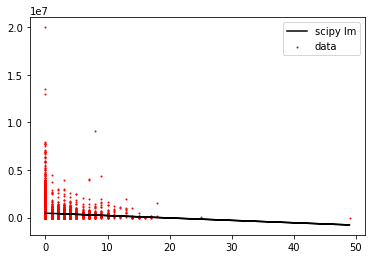

In [104]:
# predyktor - liczba pięter - apartment_floor
# zmienna przewidywana - cena

# dopasowanie regresji
x, y = df.apartment_floor.values, df.price_y.values
n, p = df.shape 
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(intercept,slope)

# przedzaiały ufności
print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.10)
print("  Conf. interval: ", stats.t.interval(0.90, n-2, loc=slope, scale=std_err))

print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.05)
print("  Conf. interval: ", stats.t.interval(0.95, n-2, loc=slope, scale=std_err))

print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.01)
print("  Conf. interval: ", stats.t.interval(0.99, n-2, loc=slope, scale=std_err))

y_ = x * slope + intercept
print("R^2 statistic:           ", r2_score(y, y_))
print("Residual Standard Error: ", np.std((y - y_), ddof=2))
print("Percentage error:        ", np.std((y - y_), ddof=2) / np.mean(y))

# wykres 
plt.scatter(x,y,marker="o",s=1,c="red",label="data")
plt.plot(x,y_,c="black",label="scipy lm", linestyle = '-')  # w tym wierszu zamiast xp, yp wpisuje x i y_
plt.legend()

461422.6143259618 0.6053473198438802
Slope:
  Std. err.:       6.451574690549871
  p-value:         0.9252450627605552 Reject the null hypothesis?  False
  Conf. interval:  (-10.006746494282035, 11.21744113396979)
Slope:
  Std. err.:       6.451574690549871
  p-value:         0.9252450627605552 Reject the null hypothesis?  False
  Conf. interval:  (-12.039814638970189, 13.250509278657947)
Slope:
  Std. err.:       6.451574690549871
  p-value:         0.9252450627605552 Reject the null hypothesis?  False
  Conf. interval:  (-16.01344599977337, 17.22414063946113)
R^2 statistic:            1.7712409061676482e-07
Residual Standard Error:  369834.88331299415
Percentage error:         0.7994100695116273


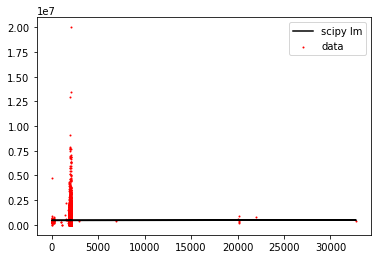

In [105]:
# predyktor - rok budowy - building_year  - ale tu trzeba sprawdzić te powyżej 2020 roku
# zmienna przewidywana - cena

# dopasowanie regresji
x, y = df.building_year.values, df.price_y.values
n, p = df.shape 
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(intercept,slope)

# przedzaiały ufności
print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.10)
print("  Conf. interval: ", stats.t.interval(0.90, n-2, loc=slope, scale=std_err))

print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.05)
print("  Conf. interval: ", stats.t.interval(0.95, n-2, loc=slope, scale=std_err))

print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.01)
print("  Conf. interval: ", stats.t.interval(0.99, n-2, loc=slope, scale=std_err))

y_ = x * slope + intercept
print("R^2 statistic:           ", r2_score(y, y_))
print("Residual Standard Error: ", np.std((y - y_), ddof=2))
print("Percentage error:        ", np.std((y - y_), ddof=2) / np.mean(y))

# wykres 
plt.scatter(x,y,marker="o",s=1,c="red",label="data")
plt.plot(x,y_,c="black",label="scipy lm", linestyle = '-')  # w tym wierszu zamiast xp, yp wpisuje x i y_
plt.legend()

562785.3134274427 -1788.902285024715
Slope:
  Std. err.:       53.96681669316792
  p-value:         2.4154173181818058e-238 Reject the null hypothesis?  True
  Conf. interval:  (-1877.6714536490067, -1700.1331164004232)
Slope:
  Std. err.:       53.96681669316792
  p-value:         2.4154173181818058e-238 Reject the null hypothesis?  True
  Conf. interval:  (-1894.6778778402693, -1683.1266922091606)
Slope:
  Std. err.:       53.96681669316792
  p-value:         2.4154173181818058e-238 Reject the null hypothesis?  True
  Conf. interval:  (-1927.9169311784879, -1649.887638870942)
R^2 statistic:            0.021628351345462038
Residual Standard Error:  365813.5938127807
Percentage error:         0.7907179221130504


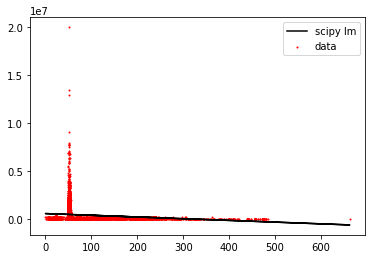

In [106]:
# predyktor - szerokość geograficzna - location_latitude
# zmienna przewidywana - cena

# dopasowanie regresji
x, y = df.location_latitude.values, df.price_y.values
n, p = df.shape 
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(intercept,slope)

# przedzaiały ufności
print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.10)
print("  Conf. interval: ", stats.t.interval(0.90, n-2, loc=slope, scale=std_err))

print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.05)
print("  Conf. interval: ", stats.t.interval(0.95, n-2, loc=slope, scale=std_err))

print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.01)
print("  Conf. interval: ", stats.t.interval(0.99, n-2, loc=slope, scale=std_err))

y_ = x * slope + intercept
print("R^2 statistic:           ", r2_score(y, y_))
print("Residual Standard Error: ", np.std((y - y_), ddof=2))
print("Percentage error:        ", np.std((y - y_), ddof=2) / np.mean(y))

# wykres 
plt.scatter(x,y,marker="o",s=1,c="red",label="data")
plt.plot(x,y_,c="black",label="scipy lm", linestyle = '-')  # w tym wierszu zamiast xp, yp wpisuje x i y_
plt.legend()

502828.59833602165 -1541.7865371976545
Slope:
  Std. err.:       39.217073903949995
  p-value:         0.0 Reject the null hypothesis?  True
  Conf. interval:  (-1606.294085718147, -1477.278988677162)
Slope:
  Std. err.:       39.217073903949995
  p-value:         0.0 Reject the null hypothesis?  True
  Conf. interval:  (-1618.6524613870808, -1464.9206130082282)
Slope:
  Std. err.:       39.217073903949995
  p-value:         0.0 Reject the null hypothesis?  True
  Conf. interval:  (-1642.8069046382664, -1440.7661697570427)
R^2 statistic:            0.030157764134729814
Residual Standard Error:  364215.5276014368
Percentage error:         0.7872636502778719


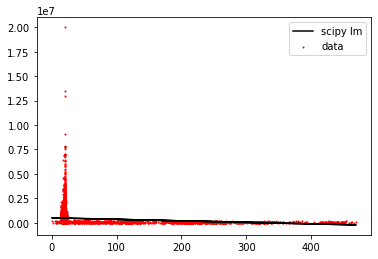

In [107]:
# predyktor - długość geograficzna - location_longitude
# zmienna przewidywana - cena

# dopasowanie regresji
x, y = df.location_longitude.values, df.price_y.values
n, p = df.shape 
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(intercept,slope)

# przedzaiały ufności
print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.10)
print("  Conf. interval: ", stats.t.interval(0.90, n-2, loc=slope, scale=std_err))

print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.05)
print("  Conf. interval: ", stats.t.interval(0.95, n-2, loc=slope, scale=std_err))

print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.01)
print("  Conf. interval: ", stats.t.interval(0.99, n-2, loc=slope, scale=std_err))

y_ = x * slope + intercept
print("R^2 statistic:           ", r2_score(y, y_))
print("Residual Standard Error: ", np.std((y - y_), ddof=2))
print("Percentage error:        ", np.std((y - y_), ddof=2) / np.mean(y))

# wykres 
plt.scatter(x,y,marker="o",s=1,c="red",label="data")
plt.plot(x,y_,c="black",label="scipy lm", linestyle = '-')  # w tym wierszu zamiast xp, yp wpisuje x i y_
plt.legend()

In [103]:
df.columns

Index(['apartment_room_number', 'apartment_floor', 'building_year',
       'location_latitude', 'location_longitude', 'location_city_name',
       'private_offer', 'price_y', 'area_total_y', 'price_permeter_y'],
      dtype='object')

In [109]:
# predyktor - powierzchnia - area_total_y
# zmienna przewidywana - cena

# dopasowanie regresji
x, y = df.area_total_y.values, df.price_y.values
n, p = df.shape 
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(intercept,slope)

# przedzaiały ufności
print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.10)
print("  Conf. interval: ", stats.t.interval(0.90, n-2, loc=slope, scale=std_err))

print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.05)
print("  Conf. interval: ", stats.t.interval(0.95, n-2, loc=slope, scale=std_err))

print("Slope:")
print("  Std. err.:      ", std_err)
print("  p-value:        ", p_value, "Reject the null hypothesis? ", p_value < 0.01)
print("  Conf. interval: ", stats.t.interval(0.99, n-2, loc=slope, scale=std_err))

y_ = x * slope + intercept
print("R^2 statistic:           ", r2_score(y, y_))
print("Residual Standard Error: ", np.std((y - y_), ddof=2))
print("Percentage error:        ", np.std((y - y_), ddof=2) / np.mean(y))

# wykres 
plt.scatter(x,y,marker="o",s=1,c="red",label="data")
plt.plot(x,y_,c="black",label="scipy lm", linestyle = '-')  # w tym wierszu zamiast xp, yp wpisuje x i y_
plt.legend()

nan nan
Slope:
  Std. err.:       nan
  p-value:         nan Reject the null hypothesis?  False
  Conf. interval:  (nan, nan)
Slope:
  Std. err.:       nan
  p-value:         nan Reject the null hypothesis?  False
  Conf. interval:  (nan, nan)
Slope:
  Std. err.:       nan
  p-value:         nan Reject the null hypothesis?  False
  Conf. interval:  (nan, nan)


C:\Users\48500\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\48500\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\48500\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\48500\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1996: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').